In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

# Data Exploration

In [104]:
data = pd.read_csv('Sentiment.csv')

In [105]:
data.describe()

,id,candidate_confidence,relevant_yn_confidence,sentiment_confidence,subject_matter_confidence,retweet_count,tweet_id
count,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,1.387100e+04
mean,6936.000000,0.855689,0.927304,0.756936,0.782801,45.803331,6.296058e+17
std,4004.357127,0.241388,0.141696,0.217682,0.258215,153.981724,9.611863e+13
min,1.000000,0.222200,0.333300,0.186000,0.222200,0.000000,6.294531e+17
25%,3468.500000,0.674200,1.000000,0.651700,0.641300,0.000000,6.294861e+17
50%,6936.000000,1.000000,1.000000,0.681300,1.000000,2.000000,6.296726e+17
75%,10403.500000,1.000000,1.000000,1.000000,1.000000,44.000000,6.296882e+17
max,13871.000000,1.000000,1.000000,1.000000,1.000000,4965.000000,6.297017e+17


In [106]:
data = data[['text', 'sentiment']]

In [107]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


<AxesSubplot:xlabel='sentiment_names'>

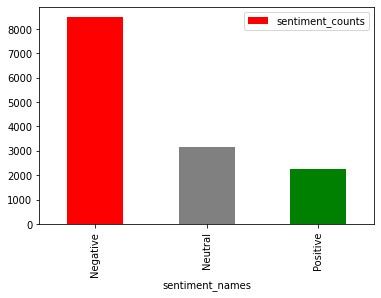

In [110]:
sentiment_counts = data['sentiment'].value_counts()
df_counts = pd.DataFrame({'sentiment_names': sentiment_counts.index, 'sentiment_counts': sentiment_counts})
df_counts.head()
df_counts.plot.bar(x='sentiment_names', y='sentiment_counts', color=['red','gray','green'])

# Data Preprocessing

* Cleaning alphanumeric symbols with regular expresions and removing RTs from each tweet
* Removing stopwords
* Applying stemming
* Converting labels from categorical to numeric

In [41]:
stemmer = SnowballStemmer(language='english') 

def sentiment_to_numeric(sentiment):
    if sentiment == 'Positive':
        return 0
    elif sentiment == 'Neutral':
        return 1
    elif sentiment == 'Negative':
        return 2

def clean_alphanumeric_tokenize_stopwords_stemming(text):
    cleaned_text = re.sub(r'[^\w]', ' ', text).strip()
    cleaned_text = cleaned_text.replace('RT', '').lower()
    tokens = [stemmer.stem(token) for token in word_tokenize(cleaned_text) if not token in stopwords.words('english')]
    tweet = ''
    for token in tokens:
        tweet += token + ' '
    
    return tweet

In [42]:
data['sentiment'] = data['sentiment'].apply(sentiment_to_numeric)

In [43]:
data['text'] = data['text'].apply(clean_alphanumeric_tokenize_stopwords_stemming)

In [111]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


# Creating Pipelines and Models

* Applying bag of words
* Applying TF + IDF transformation
* Creating different models: MultinomialNB, Random Forest, SGD, KNN
* Checking models' accuracy using cross validation

In [45]:
#MultinomialNB

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])
scores = cross_val_score(text_clf, data['text'], data['sentiment'], cv=5, scoring='accuracy', n_jobs=-1)
print('Scores', scores)
print('Mean Score', np.mean(scores))

Scores [0.63171171 0.63662581 0.62725306 0.64708003 0.61715934]
Mean Score 0.631965990503842


In [46]:
#KNN Classifier

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier(n_jobs=-1)),
])
scores = cross_val_score(text_clf, data['text'], data['sentiment'], cv=5, scoring='accuracy', n_jobs=-1)
print('Scores', scores)
print('Mean Score', np.mean(scores))

Scores [0.54738739 0.53785148 0.55479452 0.61968277 0.63085797]
Mean Score 0.5781148242691141


In [47]:
#SGD Classifier

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(n_jobs=-1)),
])
scores = cross_val_score(text_clf, data['text'], data['sentiment'], cv=5, scoring='accuracy', n_jobs=-1)
print('Scores', scores)
print('Mean Score', np.mean(scores))

Scores [0.65981982 0.66762797 0.6297765  0.67195386 0.67844268]
Mean Score 0.6615241658385134


In [48]:
#Random Forest Classifier

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_jobs=-1)),
])
scores = cross_val_score(text_clf, data['text'], data['sentiment'], cv=5, scoring='accuracy', n_jobs=-1)
print('Scores', scores)
print('Mean Score', np.mean(scores))

Scores [0.64468468 0.64852199 0.60562365 0.65428983 0.6813266 ]
Mean Score 0.6468893522217243


# Checking Models' Accuracy on Training and Testing Datasets

In [62]:
X = data['text'].to_numpy()
y = data['sentiment'].to_numpy()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11096,) (2775,) (11096,) (2775,)


In [73]:
#Train Multinomial NB Classifier

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])
bayes = text_clf.fit(X_train, y_train)
bayes_prediction = bayes.predict(X_test)
np.mean(bayes_prediction == y_test)

0.6475675675675676

In [124]:
#Train Random Forest Classifier

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_jobs=-1, random_state=42)),
])
forest = text_clf.fit(X_train, y_train)
forest_prediction = forest.predict(X_test)
np.mean(forest_prediction == y_test)

0.6846846846846847

In [125]:
#Train SGD Classifier

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(n_jobs=-1, random_state=42)),
])
sgd = text_clf.fit(X_train, y_train)
sgd_prediction = sgd.predict(X_test)
np.mean(sgd_prediction == y_test)

0.6944144144144144

# Confusion Matrix Visualization
* Using seaborn heatmap to visualize final model's performances

In [96]:
sgd_cf = confusion_matrix(sgd_prediction, y_test)
forest_cf = confusion_matrix(forest_prediction, y_test)
bayes_cf = confusion_matrix(bayes_prediction, y_test)

categories = ['Positive', 'Neutral', 'Negative']

<AxesSubplot:>

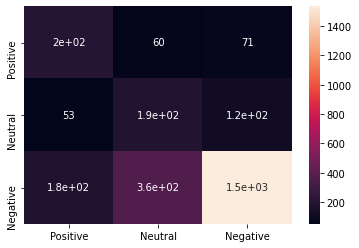

In [97]:
sns.heatmap(sgd_cf, annot=True, xticklabels=categories, yticklabels=categories)

<AxesSubplot:>

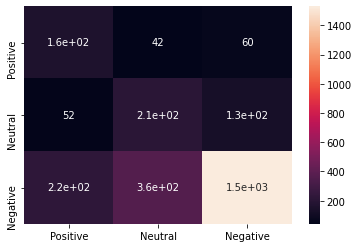

In [98]:
sns.heatmap(forest_cf, annot=True, xticklabels=categories, yticklabels=categories)

<AxesSubplot:>

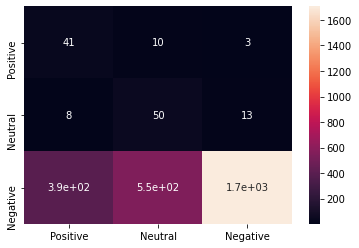

In [99]:
sns.heatmap(bayes_cf, annot=True, xticklabels=categories, yticklabels=categories)

# Conclusion

**SGD Classifier** is the best model with an accuracy of **69.44%**.
I have also tried **MultinomialNB** and **Random Forest Classifier** but their accuracy is lower: **64.75%** and **68.46%**.

The results show a very poor performance for identifying sentiment in tweets. For improving these results, it would be a good idea to explore different models and try to fine-tune its hyperparameters. It is also a good idea to change the data preprocessing and trying different things.